In [4]:
'''
Cell #1:
This is the cell where you import all of the Python packages needed for these activities
Actions: hit the 'Run' button
'''
!pip install impedance

import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import impedance

from impedance import preprocessing

pi = (math. pi)
e = (math.e )
%matplotlib notebook
from pylab import rcParams

rcParams['figure.figsize'] =10,8

def define_figure(xlabel="X", ylabel="Y"):
    fig = plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax


zsh:1: command not found: pip


In [5]:
'''
Cell #2:
This is where you will import all of the raw EIS data needed for these activities
Actions: Hit the run button
'''


#Load data from the example EIS data
freq1, Zdata1 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')
freq2, Zdata2 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')
freq3, Zdata3 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')


# Keep only the impedance data in the first quadrant
freq1, Zdata1 = preprocessing.ignoreBelowX(freq1, Zdata1)
freq2, Zdata2 = preprocessing.ignoreBelowX(freq2, Zdata2)
freq3, Zdata3 = preprocessing.ignoreBelowX(freq3, Zdata3)

FileNotFoundError: [Errno 2] No such file or directory: 'Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA'

In [ ]:
'''
Cell #3:
This is where you will construct different equivalent circuit models.
Actions: Hit the 'Run' button to generate the initial guesses for each ECM. 
You will return to this cell to change the initial guesses to optimize the fitting.
'''
from impedance.models.circuits import CustomCircuit

ECM_1 = 'R0-p(C1,R1-Wo)'
initial_guess1 = [7, 5e-6,30,4.0e-12,0.5]

circuit1 = CustomCircuit(ECM_1, initial_guess=initial_guess1)

ECM_2 = 'R0-p(C1,R1-CPE)'
initial_guess2 = [7, 5e-6,30,0.0046,0.7]

circuit2 = CustomCircuit(ECM_2, initial_guess=initial_guess2)

ECM_3 = 'R0-p(CPE1,R1-CPE2)'
initial_guess3 = [7, 0.004,0.9,30,0.0046,0.7]

circuit3 = CustomCircuit(ECM_3, initial_guess=initial_guess3)



print(circuit1,circuit2,circuit3)

In [ ]:
'''
Cell #4: 
This is the cell where can access the fit parameters from the respective ECMs.
Action: Hit the 'Run' button 
'''

circuit1.fit(freq1, Zdata1)
circuit2.fit(freq2, Zdata2)
circuit3.fit(freq3, Zdata3)


print(circuit1,circuit2,circuit3)

In [ ]:
'''
Cell #5: 
This is the cell where you fully simulate the impedance data using your ECMs.
Actions: Hit the 'Run' button
'''
Zfit1=circuit1.predict(freq1)
Zfit2=circuit2.predict(freq2)
Zfit3=circuit3.predict(freq3)



In [ ]:
'''
Cell #6:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_1.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata1,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit1, fmt='-',ax=ax, color='r')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('[insert file path where figure storage is desried]', dpi=300)

In [3]:
'''
Cell #7:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_2.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata2,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit2, fmt='-',ax=ax, color='b')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

<IPython.core.display.Javascript object>

NameError: name 'Zdata2' is not defined

<IPython.core.display.Javascript object>


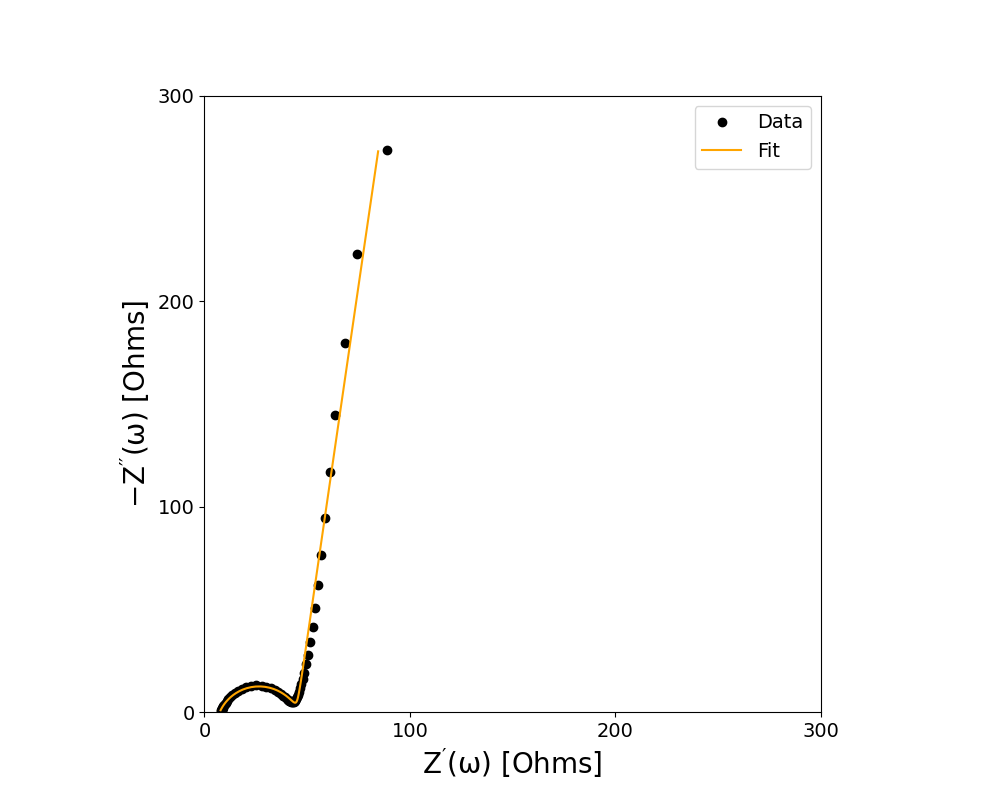

In [27]:
'''
Cell #8:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_3.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata3,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit3, fmt='-',ax=ax, color='orange')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

In [ ]:
'''
Cell #9
This is the cell where you calculate the chi-squared for the EIS fitting with ECM_1, ECM_2, and ECM_3.
Action: Hit the 'Run' button.
'''

# Sample experimental and simulated EIS data
experimental_data1 = np.array([Zdata1], dtype=complex)  
simulated_data1 = np.array([Zfit1], dtype=complex)     

experimental_data2 = np.array([Zdata2], dtype=complex)  
simulated_data2 = np.array([Zfit2], dtype=complex)     

experimental_data3 = np.array([Zdata3], dtype=complex)  
simulated_data3 = np.array([Zfit3], dtype=complex)     

# Ensure both arrays are of the same shape and type
for exp, sim in [(experimental_data1, simulated_data1), 
                 (experimental_data2, simulated_data2), 
                 (experimental_data3, simulated_data3)]:
    if exp.shape != sim.shape:
        raise ValueError("Experimental and simulated data must have the same shape.")

# Function to calculate chi-squared with absolute value for imaginary part
def chi_squared_complex(experimental, simulated):
    chi_sq_real = np.sum((experimental.real - simulated.real) ** 2 / np.abs(simulated.real))
    chi_sq_imag = np.sum((np.abs(experimental.imag - simulated.imag)) ** 2 / np.abs(simulated.imag))
    return chi_sq_real + chi_sq_imag  # Total chi-squared

# Calculate chi-squared for each dataset
chi_squared1 = chi_squared_complex(experimental_data1, simulated_data1)
chi_squared2 = chi_squared_complex(experimental_data2, simulated_data2)
chi_squared3 = chi_squared_complex(experimental_data3, simulated_data3)

# Print results
print("Chi-squared values:")
print(f"Dataset 1: {chi_squared1}")
print(f"Dataset 2: {chi_squared2}")
print(f"Dataset 3: {chi_squared3}")